In [7]:
import subprocess
import sys
import pickle
from matplotlib import pyplot as plt
from main_asynchronous import sin_wave_iterator

Standard Sampling - Data Shapes:
bX shape: (32, 121, 1)
bXmask shape: (32, 121)
bT shape: (32, 121)
bY shape: (32,)


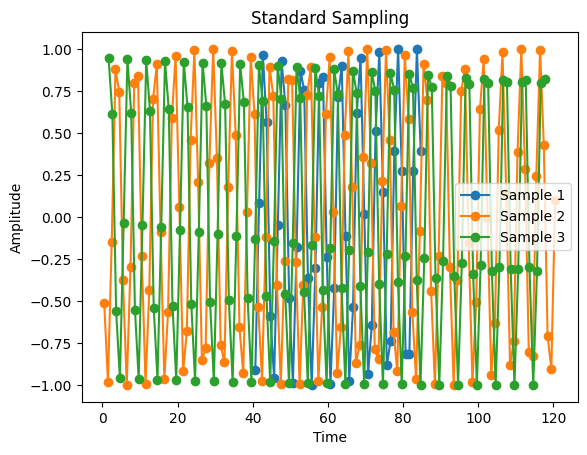

Asynchronous Sampling - Data Shapes:
bX shape: (32, 122, 1)
bXmask shape: (32, 122)
bT shape: (32, 122)
bY shape: (32,)


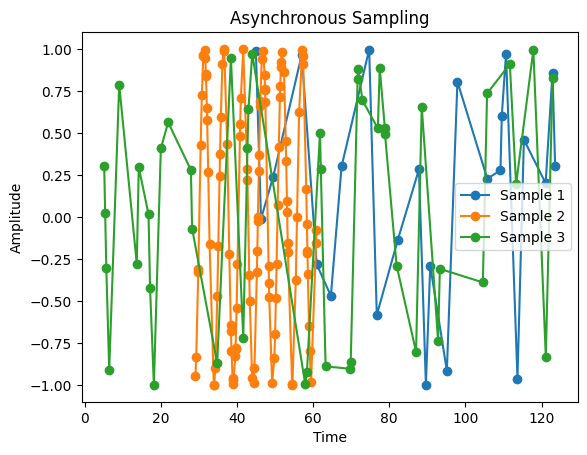

In [8]:
# Plot different sampling methods
sampling_methods = {
    "Standard Sampling": {
        "async_sample": False,
        "sample_res": 1.0  # Standard sampling every 1 ms
    },
    "Asynchronous Sampling": {
        "async_sample": True
    }
}

for method_name, params in sampling_methods.items():
    bX, bXmask, bT, bY = next(sin_wave_iterator(**params))
    print(f"{method_name} - Data Shapes:")
    print("bX shape:", bX.numpy().shape)
    print("bXmask shape:", bXmask.numpy().shape)
    print("bT shape:", bT.numpy().shape)
    print("bY shape:", bY.numpy().shape)
    plt.figure()
    plt.title(f"{method_name}")
    plt.plot(bT[0][bXmask[0] != 0], bX[0][bXmask[0] != 0], 'o-', label='Sample 1')
    plt.plot(bT[1][bXmask[1] != 0], bX[1][bXmask[1] != 0], 'o-', label='Sample 2')
    plt.plot(bT[2][bXmask[2] != 0], bX[2][bXmask[2] != 0], 'o-', label='Sample 3')
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

In [9]:
# Run main.py script to train the models and generate acc.pkl
process = subprocess.Popen(['python', 'main_standard.py', '--epochs', '15', '--batch-size', '64', '--save-model'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Print output in real time to monitor progress
while True:
    output = process.stdout.readline()
    if output == '' and process.poll() is not None:
        break
    if output:
        sys.stdout.write(output)
        sys.stdout.flush()

# After running, acc.pkl should be available for the next steps in the notebook.

# Load the saved accuracies
acc = pickle.load(open("acc_standard.pkl", "rb"))

# Display loaded data
print("LSTM Test Accuracy: ", acc['lstm'])
print("PLSTM Test Accuracy: ", acc['plstm'])

Training LSTM with Standard Sampling.

Test set: Average loss: 0.6945, Accuracy: 531/1024 (52%)

Train Epoch: 0 	Loss: 0.695447
Train Epoch: 10 	Loss: 0.698875
Train Epoch: 20 	Loss: 0.686613
Train Epoch: 30 	Loss: 0.686800
Train Epoch: 40 	Loss: 0.687237
Train Epoch: 50 	Loss: 0.686044
Train Epoch: 60 	Loss: 0.692674
Train Epoch: 70 	Loss: 0.681814
Train Epoch: 80 	Loss: 0.694680
Train Epoch: 90 	Loss: 0.697080
Train Epoch: 100 	Loss: 0.688355
Train Epoch: 110 	Loss: 0.696983
Train Epoch: 120 	Loss: 0.686637
Train Epoch: 130 	Loss: 0.691151
Train Epoch: 140 	Loss: 0.694789
Train Epoch: 150 	Loss: 0.696088
Train Epoch: 160 	Loss: 0.694393
Train Epoch: 170 	Loss: 0.691762
Train Epoch: 180 	Loss: 0.693886
Train Epoch: 190 	Loss: 0.693606
Train Epoch: 200 	Loss: 0.693373
Train Epoch: 210 	Loss: 0.692259
Train Epoch: 220 	Loss: 0.694492
Train Epoch: 230 	Loss: 0.694944
Train Epoch: 240 	Loss: 0.689885
Train Epoch: 250 	Loss: 0.694962
Train Epoch: 260 	Loss: 0.690433
Train Epoch: 270 	Loss:

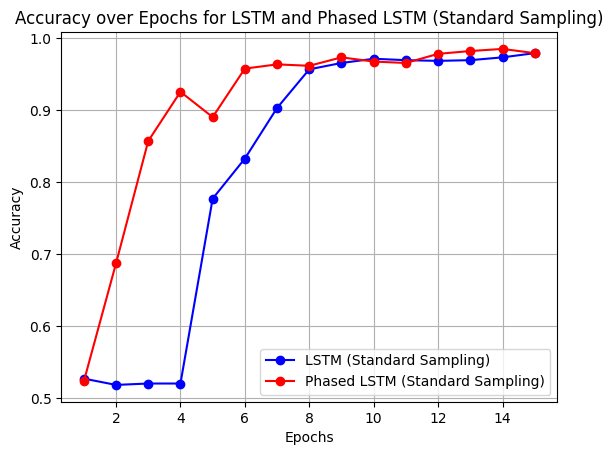

In [10]:
import pickle
import matplotlib.pyplot as plt

# Load the saved accuracies from the new standard sampling training
acc = pickle.load(open("acc_standard.pkl", "rb"))

# Plot accuracy over epochs (LSTM vs Phased LSTM with standard sampling)
plt.figure()
plt.plot(range(1, len(acc['lstm']) + 1), acc['lstm'], 'b-o', label='LSTM (Standard Sampling)')
plt.plot(range(1, len(acc['plstm']) + 1), acc['plstm'], 'r-o', label='Phased LSTM (Standard Sampling)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for LSTM and Phased LSTM (Standard Sampling)')
plt.legend()
plt.grid(True)
plt.show()

